<a href="https://colab.research.google.com/github/viniciusriosfuck/python-financas/blob/main/Classifica%C3%A7%C3%A3o_e_explora%C3%A7%C3%A3o_de_textos_financeiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação e exploração de textos financeiros

- Base de dados: https://www.kaggle.com/yash612/stockmarket-sentiment-dataset
- Equbot: https://equbot.com/

## Importação das bibliotecas

In [4]:
import spacy
spacy.__version__

'2.2.4'

In [5]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import re

## Carregamento da base de dados

In [6]:
url = 'https://raw.githubusercontent.com/viniciusriosfuck/python-financas/main/data/stock_data.csv'
base = pd.read_csv(url)
base.shape

(5791, 2)

In [7]:
base.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [8]:
base.tail()

,Text,Sentiment
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1
5790,"#Sensex, #Nifty climb off day's highs, still u...",1


In [9]:
base["Sentiment"].value_counts()
# np.unique(base['Sentiment'], return_counts=True)

 1    3685
-1    2106
Name: Sentiment, dtype: int64

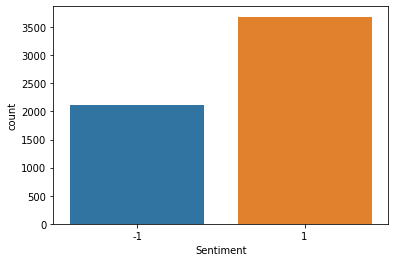

In [10]:
sns.countplot(x=base['Sentiment']);

In [11]:
base.isnull().sum()

Text         0
Sentiment    0
dtype: int64

## Função para pré-processamento dos textos

In [12]:
!python -m spacy download pt

     |████████████████████████████████| 21.2MB 7.7MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-cp36-none-any.whl size=21186283 sha256=33e99eb1c4cd4060c5b7043e0770ede0b0949f20826c5fa3c70afa46c3683b28
  Stored in directory: /tmp/pip-ephem-wheel-cache-iskkcf0h/wheels/ea/94/74/ec9be8418e9231b471be5dc7e1b45dd670019a376a6b5bc1c0
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [13]:
spacy.load('pt')

In [14]:
print(spacy.lang.pt.stop_words.STOP_WORDS)

{'tarde', 'treze', 'também', 'comprida', 'somente', 'nós', 'zero', 'inicio', 'número', 'segunda', 'algumas', 'minhas', 'direita', 'do', 'portanto', 'entre', 'vosso', 'novas', 'quinto', 'teus', 'fazeis', 'os', 'cá', 'sabe', 'dizem', 'apoia', 'tenho', 'ser', 'outros', 'sem', 'estiveste', 'querem', 'sétimo', 'tendes', 'ter', 'tanto', 'porque', 'apoio', 'qualquer', 'outra', 'por', 'ali', 'além', 'elas', 'assim', 'ver', 'estava', 'vossas', 'próprio', 'cedo', 'mais', 'se', 'números', 'sete', 'sois', 'esse', 'quarto', 'sempre', 'obrigada', 'algo', 'das', 'sobre', 'te', 'fostes', 'outras', 'vez', 'está', 'pouco', 'quer', 'aquela', 'oitava', 'neste', 'essas', 'inclusive', 'tive', 'aos', 'contra', 'diz', 'bastante', 'custa', 'dois', 'estar', 'muitos', 'para', 'dezanove', 'essa', 'nada', 'lugar', 'deve', 'naquela', 'num', 'disso', 'desta', 'grande', 'próxima', 'puderam', 'nas', 'onde', 'estas', 'vai', 'pode', 'tentei', 'fora', 'segundo', 'oito', 'ele', 'próximo', 'estes', 'fez', 'dar', 'sim', 'co

In [15]:
pln = spacy.load('en')
pln

In [16]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS
print(stop_words)

{'neither', 'she', 'amongst', 'thus', 'to', 'elsewhere', 'empty', 'hereby', 'also', 'sometimes', 'cannot', 'nobody', 'formerly', 'here', 'his', 'always', 'fifty', 'forty', "n't", '’m', 'both', 'most', 'wherever', 'well', 'is', 'mostly', 'of', 'used', 'whence', 'everyone', 'often', 'alone', 'the', 'whereafter', 'all', 'as', 'around', 'if', 'name', 'same', 'say', 'ourselves', "'ve", 'along', 'do', 'many', 'can', 'whenever', 'between', 'seeming', 'within', 'four', 'thereafter', 'former', 'quite', 'such', '‘re', 'part', 'hence', 'whereupon', 'full', 'made', 'nowhere', 'make', 'with', 'front', 'may', 'together', 'those', 'that', 'becoming', 'unless', '‘s', 'give', 'my', 'somehow', 'per', 'thru', 'what', 'three', 'why', 'hereupon', '‘m', 'nothing', 'an', 'me', 'show', 'take', 'ever', 'about', 'other', '’re', 'using', 'noone', 'has', 'due', 'in', 'and', 'you', 'them', 'off', 'whose', 'down', 'various', 'others', 'up', 'himself', 'whereas', 'without', 'during', 'beforehand', '‘ll', 'anyhow', '

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def preprocessamento(texto):
  texto = texto.lower()
  texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto)  # twitter username
  texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)  # url
  texto = re.sub(r" +", ' ', texto)

  documento = pln(texto)
  lista = []
  for token in documento:
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista 
           if palavra not in stop_words 
           and palavra not in string.punctuation]
  lista = ' '.join([str(elemento) for elemento in lista
                    if not elemento.isdigit()])

  return lista

In [19]:
preprocessamento('I will @test9&+ buy the https://www.iaexpert.academy Apple stock. 9 8 care. caring! car')

'buy apple stock care care car'

## Pré-processamento da base de dados

### Limpeza dos textos

In [20]:
base.head(10)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,-1
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1
8,GOOG - ower trend line channel test & volume s...,1
9,AAP will watch tomorrow for ONG entry.,1


In [21]:
%%time
base['Text'] = base['Text'].apply(preprocessamento)

CPU times: user 58.7 s, sys: 84.5 ms, total: 58.8 s
Wall time: 59.1 s


In [23]:
base.head(10)

,Text,Sentiment
0,kicker -PRON- watchlist xide tit soq pnk cpw b...,1
1,user aap movie return fea geed indicator trade...,1
2,user -PRON- afraid short amzn -PRON- look like...,1
3,mnta 12.00,1
4,oi 21.37,1
5,pgnx 3.04,1
6,aap user current downtrend break short term co...,-1
7,monday relative weakness nyx win tie tap ice i...,-1
8,goog ower trend line channel test volume support,1
9,aap watch tomorrow ong entry,1


## Visualização e exploração

### Número médio de caracteres

In [24]:
base['tamanho'] = base['Text'].apply(len)
base.head()

,Text,Sentiment,tamanho
0,kicker -PRON- watchlist xide tit soq pnk cpw b...,1,81
1,user aap movie return fea geed indicator trade...,1,59
2,user -PRON- afraid short amzn -PRON- look like...,1,89
3,mnta 12.00,1,10
4,oi 21.37,1,8


In [25]:
base['tamanho'].describe()

count    5791.000000
mean       50.535313
std        24.960696
min         0.000000
25%        31.000000
50%        50.000000
75%        69.000000
max       129.000000
Name: tamanho, dtype: float64

In [26]:
positivo = base[base['Sentiment'] == 1]

In [39]:
base.loc[base['tamanho'] == 0].index

Int64Index([1250, 3488, 3524], dtype='int64')

In [27]:
positivo['tamanho'].describe()

count    3685.000000
mean       49.721031
std        24.948346
min         0.000000
25%        30.000000
50%        48.000000
75%        68.000000
max       129.000000
Name: tamanho, dtype: float64

In [28]:
negativo = base[base['Sentiment'] == -1]

In [29]:
negativo['tamanho'].describe()

count    2106.000000
mean       51.960114
std        24.924272
min         2.000000
25%        32.250000
50%        51.000000
75%        71.000000
max       123.000000
Name: tamanho, dtype: float64

### Nuvem de palavras

In [30]:
textos_positivos = positivo['Text'].tolist()
len(textos_positivos)

3685

In [31]:
textos_positivos[0:10]

['kicker -PRON- watchlist xide tit soq pnk cpw bpz aj trade method method prev post',
 'user aap movie return fea geed indicator trade year awesome',
 'user -PRON- afraid short amzn -PRON- look like near monopoly ebook infrastructure service',
 'mnta 12.00',
 'oi 21.37',
 'pgnx 3.04',
 'goog ower trend line channel test volume support',
 'aap watch tomorrow ong entry',
 '-PRON- assume fcx open tomorrow 34.25 trigger buy like setup',
 '-PRON- worry -PRON- expect market rally usually exact opposite happen time -PRON- shall soon bac spx jpm']

In [32]:
textos_positivos_string = ' '.join(textos_positivos)

In [33]:
textos_positivos_string

"kicker -PRON- watchlist xide tit soq pnk cpw bpz aj trade method method prev post user aap movie return fea geed indicator trade year awesome user -PRON- afraid short amzn -PRON- look like near monopoly ebook infrastructure service mnta 12.00 oi 21.37 pgnx 3.04 goog ower trend line channel test volume support aap watch tomorrow ong entry -PRON- assume fcx open tomorrow 34.25 trigger buy like setup -PRON- worry -PRON- expect market rally usually exact opposite happen time -PRON- shall soon bac spx jpm aap gamco arry haverty apple extremely cheap great video user maykiljil post agree msft higher possibly north momentum come etfc break ma200 resistance solid volume friday ong set ha hit 35.65 mean resume target level .. user gameplan shoot today like trend break c+h break oc weekly trend break july fcx gapping ideal entry look pull open entry user great list particularly like fisv syk buy hold type check free list athx upper trend line ng nice pnf breakout need follow x swing swy float s

In [40]:
len(textos_positivos_string)

186906

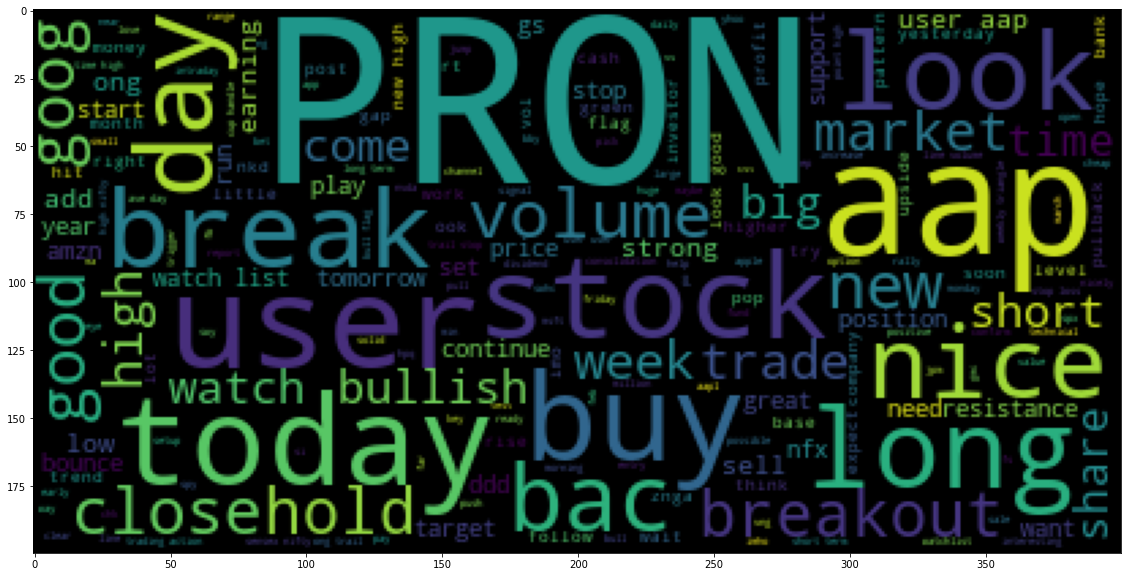

In [41]:
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(textos_positivos_string));

In [42]:
lista_negativo = negativo['Text'].tolist()
textos_negativos_string = ' '.join(lista_negativo)

In [43]:
len(textos_negativos_string)

111533

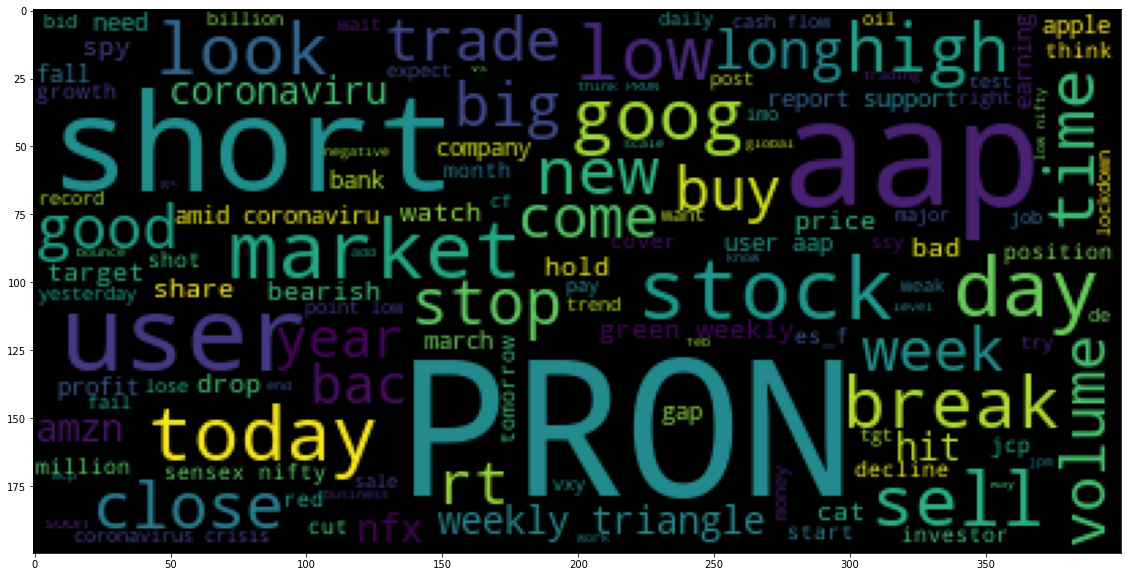

In [44]:
plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(textos_negativos_string));

### Extração de entidades nomeadas

- Siglas: https://spacy.io/api/annotation#named-entities

In [45]:
documento = pln(textos_positivos_string)

In [46]:
from spacy import displacy
displacy.render(documento, style='ent', jupyter=True)

In [47]:
empresas_positivas = []
for entidade in documento.ents:
  if entidade.label_ == 'ORG':
    print(entidade.text, entidade.label_)
    empresas_positivas.append(entidade.text)

aap ORG
mnta ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
axa ORG
aap ORG
aap ORG
ebay ORG
aap ORG
aap ORG
msft compq new post ORG
aap ORG
ebay ORG
vbd xide ORG
isi aig nice bull ORG
pfe ORG
aap ORG
es_f ORG
spx ORG
huston -PRON- ORG
aap ORG
triangle ORG
fibs ORG
vng huge news patent ORG
vng ORG
gm ORG
vng post nice ORG
oas ORG
mca ORG
aap ORG
aap ORG
ftc ORG
vng ORG
aap ORG
aap ORG
mye ORG
aap ORG
vey ORG
fed ORG
nvda bounce continue stock ORG
rising.obv ORG
ong aapl ORG
amzn daily ORG
sma ORG
sma ORG
aap ORG
axa ORG
aap ORG
aap ORG
aap ORG
ford ORG
ford ORG
pa bank ORG
pick bac c san gs ORG
ceg ORG
aap ORG
ceg ORG
11.50 ORG
triangle ORG
ceg ORG
ceg ORG
avg ORG
aap ORG
aap ORG
obv ORG
aap ORG
avg day ORG
aap ORG
kog ORG
aap ORG
triangle acad ORG
spx +1.90 mo later -PRON- week ORG
sma ORG
voc ORG
aap ORG
aap ORG
intel guess ORG
aap ORG
aap ORG
s&p ORG
aap ORG
bullish cross ORG
obv ORG
aap ORG
aap ORG
aap ORG
triangle ORG
aap ORG
aap ORG
aap ORG
aap ORG
ssys ORG
aap ORG
aap ORG
vey green

In [48]:
len(empresas_positivas)

1050

In [49]:
empresas_positivas = set(empresas_positivas)

In [50]:
len(empresas_positivas)

364

In [51]:
print(empresas_positivas)

{'cox crocs grow', 'mark resistance', 'golden cross daily', 'amazon', 'yb', 'etf inch', 'k', 'fibs', 'nvda qcom', 'triangle dvax', 'tsn', 'triangle fnfg', 'hv', 'compq', 'msft compq new post', 'snt', 'ock star direct tv', 'spx compq ind', 'sps', 'u amzn takg baseball', 'div inc', 'amzn daily', 'ge', 'central bank', 'jah jaden corp -PRON-', 'vey', 'evi', 'korea inc', 'vsn', 'triangle', 'tx ec', 'samsung disappoint night', 'sa', 'nvda ihs daily', '~should', 'amtd td ameritrade', 'eod yest', 'new york stock exchange', 'nti', 'aap motley fool', 'spw sunpower corporation', 'bull signal', 'kex', 'lakh crore', 'great fed', 'un', 'mca', 'tbi staffing co.', 'px', 'ltra', 'biz decline news', 'ceg', 'voc', 'time2research', 'ed daily weekly', 'abc', 'opec', 'aap christmas co.', 'smith', 'qtr', 'vng huge news patent', 'el', '.user', 'cld', 'bell netsuite enterprise n', 'sma', 'pos', 'xco gift matter', 'mye', 'spx', 'gd chk gd share', 'depo bounce fibo line', 'mnta', 'zeo', 'triangle mnk', 'kkd yumm

In [52]:
empresas_negativas = []
documento = pln(textos_negativos_string)
for entidade in documento.ents:
  if entidade.label_ == 'ORG':
    print(entidade.text, entidade.label_)
    empresas_negativas.append(entidade.text)

aap ORG
nyx ORG
aap ORG
nkd ORG
phm ORG
coh ORG
bwd ORG
aig american international group ORG
sony ORG
wtw ORG
aap ORG
fed ORG
es_f ORG
aap ORG
aap ORG
aap ORG
obv ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
nvda enko view red dead ORG
sma ORG
aap ORG
triangle ORG
aap ORG
es_f ORG
triangle heo ORG
aap ORG
aap ORG
triangle ktos ORG
skx ORG
triangle ORG
ish jpm 1st ORG
triangle ORG
triangle ORG
triangle ORG
south yum ORG
es_f ORG
fio air ORG
aap ORG
aap ORG
17.90s ORG
ssys ORG
mkt ORG
triangle ctic ORG
clearwire corp ORG
yhoo dec bb&t cm ORG
ssys ORG
aap ORG
triangle depo ORG
triangle fnfg ORG
aap ORG
mgm ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
apple ORG
aap ORG
triangle ORG
triangle hban ORG
triangle hek ORG
spx green ORG
bell ORG
aap ORG
mgm ORG
es spx ORG
bac ORG
aap ORG
aap ORG
mkt ORG
aap ORG
triangle ktos ORG
aap ORG
triangle dn ORG
sma ORG
sma ORG
aap ORG
aap ORG
aap ORG
aap ORG
wsj party ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
aap ORG
triangle ORG
aap ORG
a

In [53]:
empresas_negativas = set(empresas_negativas)
len(empresas_negativas)

226

In [54]:
print(empresas_negativas)

{'gd', 'ibm', 'amazon', 'triangle ktos', 'gm slam', 'tech focus vision fund', 'idc', 'sna gs daily', 'jcp', 'clearwire corp', 'cnbc', 'un sa', 'gox gdxj imm', 'worldâ€', 'ma70', 'wal mart', 'exp', 'ym sca wall street retreat candle dow jones', 'ngt dumping', 'economicâ€', 'coronavirus outbreak', 'vix', 'ed asia watch cat flush', 'white house', 'maruti suzuki march', 'nkd eade stock lag', 'ish jpm 1st', 'mkt', 'triangle fnfg', 'fed', 'cboe', 'atb', 'litre fund covid-19', 'msft news', 'goldman sachs \n  ', 'coronavirus \n  ', 'compq', 'triangle essx', 'coronavirus', 'pfe', 'xfl middle promising', 'fbi', 'ecn', 'abcd', 'eader lag aggard', 'wsj party', 'coronavirus pandemic force difficult', 'nvda enko view red dead', 'apple tradingwithoutaplan yhoo', 'triangle jan snss', 'apple eade', 'china news catch', 'vxy', 'doe', 'gman', 'coronavirus scare', '.10', 'xom', 'dzz', 'ge', 'gm', 'owe', 'ngt ecb', 'becn', 'bell', 'yr', 'warner', 'wtw', 'triangle', 'krisanti', 'cae', 'wmt dj wal mart de', '

In [55]:
x = {"A", "B", "C"}
y = {'A', "D", "E"}
x.intersection(y)

{'A'}

In [56]:
x.difference(y), y.difference(x)

({'B', 'C'}, {'D', 'E'})

In [57]:
empresas_positivas_negativas = empresas_positivas.intersection(empresas_negativas)

In [58]:
len(empresas_positivas_negativas)

62

In [59]:
print(empresas_positivas_negativas)

{'gd', 'nkd', 'spx', 'ed daily', 'ibm', 'triangle', 'amazon', 'triangle ktos', 'bull', 'triangle heo', 'goldman', 'ffiv', 'spw', 'ssys', 'ceg', 'microsoft', 'morgan stanley', 'msft', 'bac', 'sec', 'mgm', 'sma', 'exc', 'exp', 'qqq', 'coh', 'nxt', 'es_f', 'vix', 'bwd', 'np', 'oas', 'mkt', 'triangle fnfg', 'fed', 'ftc', 'goldman sachs \n  ', 'nav', 'compq', 'mtg', 'triangle essx', 'coronavirus', 'isg', 'opec', 'pfe', 'ebay', 'apple', 'treasury', 'aap', 'avg', 'obv', 'triangle depo', 'triangle sho', 'vxy', 'bac bank', 'ge', 's&p', 'triangle pby', 'gm', 'dow', 'triangle cytx', 'ec'}


In [60]:
empresas_somente_positivas = empresas_positivas.difference(empresas_negativas)
len(empresas_somente_positivas)

302

In [61]:
print(empresas_somente_positivas)

{'cox crocs grow', 'mark resistance', 'golden cross daily', 'wall street bank', 'cdx watch', 'ma dollar general corporation', 'qep', 'xrx golden cross', '50sma zone c', 'yb', 'momentum hbi watch', 'sfy', 'fio', 'etf inch', 'k', 'let?s', 'vt', 'qcom', 'cgi ove trucking co.', 'packageis', 'fibs', 'tade watch', 'fox', 'nvda qcom', 'at&amp;t', 'pa bank', 'un dobe', 'bk burger stock', 'triangle dvax', 'znga', 'tsn', 'vbd xide', 'mdz', 'bac vod', 'uptrende', 'cst', 'aap cnbc', 'blog post', 'divorce qqq', 'california c', 'hv', 'intel guess', 'msft compq new post', 'snt', 'ock star direct tv', 'foreign central bank', 'dow jones', 'wk', '¦ federal reserve', 'min', 'spx compq ind', 'hindustan', '~think', 'nfx swy', 'pan hard paint', 'ssys adsk', 'hca', '11.50', 'sps', 'u amzn takg baseball', 'boeing', 'cme', 'div inc', 'cwt', 'sma pfe buffet', 'enviâ€', 'amzn daily', 'dark_pool', 'central bank', 'jah jaden corp -PRON-', 'shaâ€', 'vey', 'vey green ed good hold', 'great :)', 'axa', 'psn', 'evi', '

In [62]:
empresas_somente_negativas = empresas_negativas.difference(empresas_positivas)
len(empresas_somente_negativas)

164

In [63]:
print(empresas_somente_negativas)

{'gm slam', 'tech focus vision fund', 'idc', 'sna gs daily', 'jcp', 'clearwire corp', 'cnbc', 'un sa', 'gox gdxj imm', 'worldâ€', 'ma70', 'wal mart', 'ym sca wall street retreat candle dow jones', 'ngt dumping', 'economicâ€', 'coronavirus outbreak', 'ed asia watch cat flush', 'white house', 'maruti suzuki march', 'nkd eade stock lag', 'ish jpm 1st', 'cboe', 'litre fund covid-19', 'atb', 'msft news', 'coronavirus \n  ', 'xfl middle promising', 'fbi', 'ecn', 'abcd', 'eader lag aggard', 'wsj party', 'coronavirus pandemic force difficult', 'nvda enko view red dead', 'apple tradingwithoutaplan yhoo', 'triangle jan snss', 'apple eade', 'china news catch', 'doe', 'gman', 'coronavirus scare', '.10', 'xom', 'dzz', 'owe', 'ngt ecb', 'becn', 'bell', 'yr', 'warner', 'wtw', 'krisanti', 'cae', 'wmt dj wal mart de', 'af', 'boil', 'coronavirus pandemic', 'feb olle dice yhoo', 'sna', 's. 1st', 'kmart', 'nflx drop news', 'ngg', 'phm', 'yahoo', 'delta airline', 'iâ€', 'hsni miss expectation 4q2012', 'oyo

## Tratamento da base de dados

In [64]:
base.drop(columns=['tamanho'], inplace=True)

In [65]:
base.head()

,Text,Sentiment
0,kicker -PRON- watchlist xide tit soq pnk cpw b...,1
1,user aap movie return fea geed indicator trade...,1
2,user -PRON- afraid short amzn -PRON- look like...,1
3,mnta 12.00,1
4,oi 21.37,1


In [67]:
from sklearn.model_selection import train_test_split
base_treinamento, base_teste = train_test_split(base, test_size=0.3)

In [68]:
base_treinamento.shape

(4053, 2)

In [69]:
base_teste.shape

(1738, 2)

In [70]:
exemplo_base_dados = [["este trabalho é agradável", {"POSITIVO": True, "NEGATIVO": False}],
                      ["este lugar continua assustador", {"POSITIVO": False, "NEGATIVO": True}]]

In [71]:
base_treinamento_final = []
for texto, sentimento in zip(base_treinamento['Text'], base_treinamento['Sentiment']):
  if sentimento == 1:
    dic = ({'POSITIVO': True, 'NEGATIVO': False})
  elif sentimento == -1:
    dic = ({'POSITIVO': False, 'NEGATIVO': True})
  base_treinamento_final.append([texto, dic.copy()])

In [72]:
base_treinamento_final[10:15]

[['nfx insane', {'NEGATIVO': False, 'POSITIVO': True}],
 ['watch closely long ... aap lift higher buyback chatter detail stream',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['user ook green -PRON- plus -PRON- buy 35.25 today ddd',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['notice way advance sure page chtp', {'NEGATIVO': False, 'POSITIVO': True}],
 ['rt lockdown solve coordination problem alternative enforcement million independently try avoid infectâ€ ¦',
  {'NEGATIVO': False, 'POSITIVO': True}]]

In [73]:
len(base_treinamento_final)

4053

## Criação do classificador

In [74]:
modelo = spacy.blank('en')
categorias = modelo.create_pipe("textcat")
categorias.add_label('POSITIVO')
categorias.add_label('NEGATIVO')
modelo.add_pipe(categorias)
historico = []

In [75]:
4053 / 512

7.916015625

In [76]:
%%time
# redes neurais
modelo.begin_training()
for epoca in range(5):
  random.shuffle(base_treinamento_final)
  erros = {}
  for batch in spacy.util.minibatch(base_treinamento_final, 512):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=erros)
    historico.append(erros)
  if epoca % 1 == 0:
    print(erros)

{'textcat': 1.5789605981808563e-05}
{'textcat': 8.525605380782508e-06}
{'textcat': 4.878643039774033e-06}
{'textcat': 2.4432360135051567e-06}
{'textcat': 1.2113643919064998e-06}


In [77]:
historico_erro = []
for i in historico:
  historico_erro.append(i.get('textcat'))

In [78]:
historico_erro = np.array(historico_erro)
historico_erro

array([1.57896060e-05, 1.57896060e-05, 1.57896060e-05, 1.57896060e-05,
       1.57896060e-05, 1.57896060e-05, 1.57896060e-05, 1.57896060e-05,
       8.52560538e-06, 8.52560538e-06, 8.52560538e-06, 8.52560538e-06,
       8.52560538e-06, 8.52560538e-06, 8.52560538e-06, 8.52560538e-06,
       4.87864304e-06, 4.87864304e-06, 4.87864304e-06, 4.87864304e-06,
       4.87864304e-06, 4.87864304e-06, 4.87864304e-06, 4.87864304e-06,
       2.44323601e-06, 2.44323601e-06, 2.44323601e-06, 2.44323601e-06,
       2.44323601e-06, 2.44323601e-06, 2.44323601e-06, 2.44323601e-06,
       1.21136439e-06, 1.21136439e-06, 1.21136439e-06, 1.21136439e-06,
       1.21136439e-06, 1.21136439e-06, 1.21136439e-06, 1.21136439e-06])

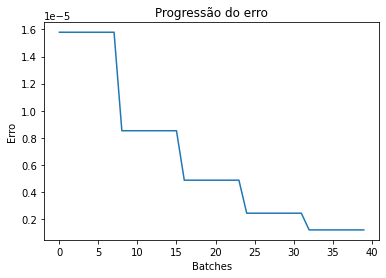

In [80]:
import matplotlib.pyplot as plt
plt.plot(historico_erro)
plt.title('Progressão do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')
plt.show()

In [81]:
modelo.to_disk('modelo')

## Testes com uma frase

In [82]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

In [83]:
base_teste.head(10)

,Text,Sentiment
2779,pay barron blog verifone plunge warn fyq1 q2 m...,-1
136,vng w/ macd turn -PRON- signal line vng post n...,1
2767,phi -PRON- software auto sell -PRON- cut -PRON...,-1
4607,dndn turn green bull hammer close,1
4212,g 2.66 current support fib evel fyi,1
3676,equity alpha twtc look like great short 24.90 ...,-1
1251,ow cent away pt 38.30 dump position great gain,1
2785,video- ice short ii,-1
5154,morgan stanley ceo james gorman senior wall st...,-1
5770,sensex nifty struggle stay positive amid volat...,-1


### Texto positivo

In [84]:
texto_positivo = base_teste['Text'][2396]
texto_positivo

'idcc .. look idcc perform touch low bband previously'

In [85]:
previsao = modelo_carregado(texto_positivo)
previsao

idcc .. look idcc perform touch low bband previously

In [86]:
previsao.cats

{'NEGATIVO': 0.19937212765216827, 'POSITIVO': 0.7939596772193909}

In [102]:
texto_positivo = 'Apple stock is increasing and I will buy it for a good price'
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'apple stock increase buy -PRON- good price'

In [103]:
modelo_carregado(texto_positivo).cats

{'NEGATIVO': 0.0023448483552783728, 'POSITIVO': 0.9782710671424866}

### Texto negativo

In [107]:
texto_negativo = base_teste['Text'][991]
previsao = modelo_carregado(texto_negativo)
previsao.cats

{'NEGATIVO': 0.05558978021144867, 'POSITIVO': 0.8747382760047913}

## Avaliação do modelo

In [108]:
previsoes = []
for texto in base_teste['Text']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [109]:
previsoes[0:5]

[{'NEGATIVO': 0.20592306554317474, 'POSITIVO': 0.6570575833320618},
 {'NEGATIVO': 0.03369712457060814, 'POSITIVO': 0.9678738117218018},
 {'NEGATIVO': 0.9564452171325684, 'POSITIVO': 0.019887283444404602},
 {'NEGATIVO': 0.23089811205863953, 'POSITIVO': 0.40808507800102234},
 {'NEGATIVO': 0.24181215465068817, 'POSITIVO': 0.8131490349769592}]

In [110]:
len(previsoes)

1738

In [111]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(-1)
previsoes_final = np.array(previsoes_final)

In [112]:
previsoes_final, np.unique(previsoes_final)

(array([ 1,  1, -1, ...,  1,  1,  1]), array([-1,  1]))

In [113]:
respostas_reais = base_teste['Sentiment'].values
respostas_reais

array([-1,  1, -1, ...,  1, -1, -1])

In [114]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(respostas_reais, previsoes_final)

0.7209436133486766

In [115]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[343, 340],
       [145, 910]])

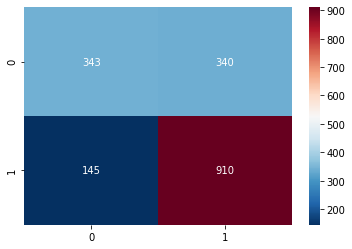

In [121]:
sns.heatmap(cm, annot=True, fmt=".0f", cmap="RdBu_r");

In [122]:
print(classification_report(respostas_reais, previsoes_final))

              precision    recall  f1-score   support

          -1       0.70      0.50      0.59       683
           1       0.73      0.86      0.79      1055

    accuracy                           0.72      1738
   macro avg       0.72      0.68      0.69      1738
weighted avg       0.72      0.72      0.71      1738

